<a href="https://colab.research.google.com/github/Mhmmd-Mhmmd/Quera_questions/blob/main/Medicalcare_insurance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
X = df.drop('charges', axis=1)
y = df['charges']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [7]:
ct = make_column_transformer(
    [MinMaxScaler(), ['age', 'bmi', 'children']],
    [OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']]
)

In [12]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [11]:
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test  = ct.transform(X_test)

In [29]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model1.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['mae', 'mse']
)

history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data=[X_test, y_test],
    epochs=30
)

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')

Epoch 1/30
34/34 [==============================] - 2s 19ms/step - loss: 12995.0088 - mae: 12995.5088 - mse: 318229632.0000 - val_loss: 11810.5693 - val_mae: 11811.0693 - val_mse: 274182496.0000
Epoch 2/30
34/34 [==============================] - 0s 6ms/step - loss: 10501.4453 - mae: 10501.9453 - mse: 252608752.0000 - val_loss: 8549.9814 - val_mae: 8550.4814 - val_mse: 185368320.0000
Epoch 3/30
34/34 [==============================] - 0s 7ms/step - loss: 8179.0244 - mae: 8179.5244 - mse: 172508416.0000 - val_loss: 7676.9019 - val_mae: 7677.4019 - val_mse: 138242080.0000
Epoch 4/30
34/34 [==============================] - 0s 5ms/step - loss: 7667.9941 - mae: 7668.4941 - mse: 147219248.0000 - val_loss: 7264.5469 - val_mae: 7265.0469 - val_mse: 126154432.0000
Epoch 5/30
34/34 [==============================] - 0s 6ms/step - loss: 7252.0444 - mae: 7252.5444 - mse: 132765144.0000 - val_loss: 6762.0366 - val_mae: 6762.5366 - val_mse: 109543240.0000
Epoch 6/30
34/34 [=========================

Epoch 1/30
34/34 [==============================] - 3s 14ms/step - loss: 10536.5977 - mae: 10537.0977 - mse: 240027632.0000 - val_loss: 7423.6685 - val_mae: 7424.1685 - val_mse: 133528288.0000
Epoch 2/30
34/34 [==============================] - 0s 4ms/step - loss: 6444.3149 - mae: 6444.8145 - mse: 112965296.0000 - val_loss: 4026.0752 - val_mae: 4026.5752 - val_mse: 58793164.0000
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 3656.2717 - mae: 3656.7717 - mse: 46501228.0000 - val_loss: 3483.6855 - val_mae: 3484.1853 - val_mse: 43971564.0000
Epoch 4/30
34/34 [==============================] - 0s 3ms/step - loss: 3357.2036 - mae: 3357.7029 - mse: 46618292.0000 - val_loss: 3288.1379 - val_mae: 3288.6379 - val_mse: 44002264.0000
Epoch 5/30
34/34 [==============================] - 0s 4ms/step - loss: 3314.8215 - mae: 3315.3215 - mse: 46615740.0000 - val_loss: 3310.3508 - val_mae: 3310.8508 - val_mse: 45661512.0000
Epoch 6/30
34/34 [==============================] - 0s

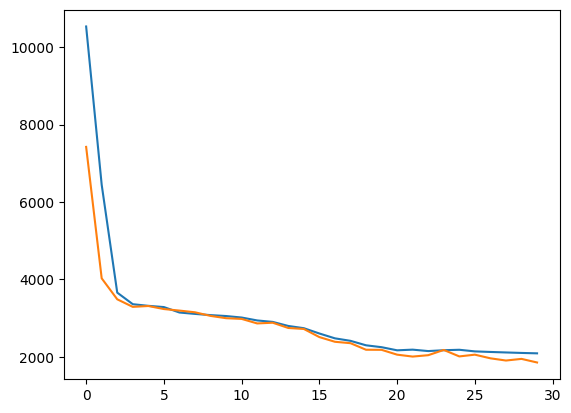

In [30]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model1.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['mae', 'mse']
)

history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data=[X_test, y_test],
    epochs=30
)

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')

Epoch 1/30
34/34 [==============================] - 3s 17ms/step - loss: 7056.6558 - mae: 7057.1558 - mse: 133447432.0000 - val_loss: 4004.5076 - val_mae: 4005.0076 - val_mse: 41796664.0000
Epoch 2/30
34/34 [==============================] - 0s 9ms/step - loss: 3750.4497 - mae: 3750.9495 - mse: 47018308.0000 - val_loss: 3400.1282 - val_mae: 3400.6282 - val_mse: 39065224.0000
Epoch 3/30
34/34 [==============================] - 0s 10ms/step - loss: 3562.0964 - mae: 3562.5964 - mse: 43535244.0000 - val_loss: 3447.2844 - val_mae: 3447.7844 - val_mse: 36072620.0000
Epoch 4/30
34/34 [==============================] - 0s 10ms/step - loss: 3336.1521 - mae: 3336.6516 - mse: 39181920.0000 - val_loss: 2948.9001 - val_mae: 2949.4001 - val_mse: 33963964.0000
Epoch 5/30
34/34 [==============================] - 0s 9ms/step - loss: 3234.6770 - mae: 3235.1770 - mse: 35704176.0000 - val_loss: 2739.2568 - val_mae: 2739.7568 - val_mse: 29839878.0000
Epoch 6/30
34/34 [==============================] - 0s 1

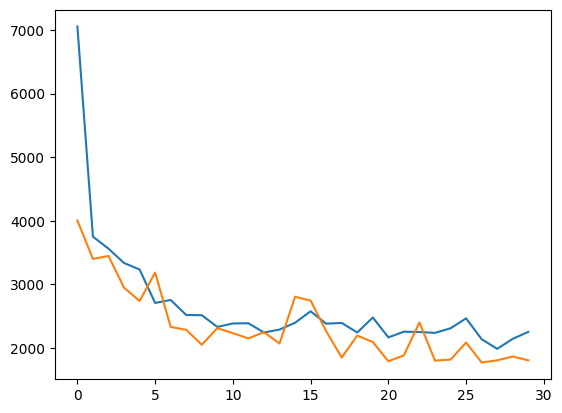

In [31]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32,  activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model1.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['mae', 'mse']
)

history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data=[X_test, y_test],
    epochs=30
)

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')

Epoch 1/30
34/34 [==============================] - 2s 14ms/step - loss: 10129.8965 - mae: 10130.3965 - mse: 219577856.0000 - val_loss: 7007.6489 - val_mae: 7008.1489 - val_mse: 118090208.0000
Epoch 2/30
34/34 [==============================] - 0s 5ms/step - loss: 5483.3281 - mae: 5483.8276 - mse: 81999760.0000 - val_loss: 3445.9624 - val_mae: 3446.4612 - val_mse: 38749348.0000
Epoch 3/30
34/34 [==============================] - 0s 4ms/step - loss: 3416.8489 - mae: 3417.3489 - mse: 44957440.0000 - val_loss: 3341.8137 - val_mae: 3342.3137 - val_mse: 42201320.0000
Epoch 4/30
34/34 [==============================] - 0s 4ms/step - loss: 3268.1465 - mae: 3268.6455 - mse: 45986984.0000 - val_loss: 3353.6265 - val_mae: 3354.1265 - val_mse: 50619392.0000
Epoch 5/30
34/34 [==============================] - 0s 4ms/step - loss: 3219.6042 - mae: 3220.1042 - mse: 46079980.0000 - val_loss: 3286.6650 - val_mae: 3287.1650 - val_mse: 38820892.0000
Epoch 6/30
34/34 [==============================] - 0s 

Text(0, 0.5, 'loss')

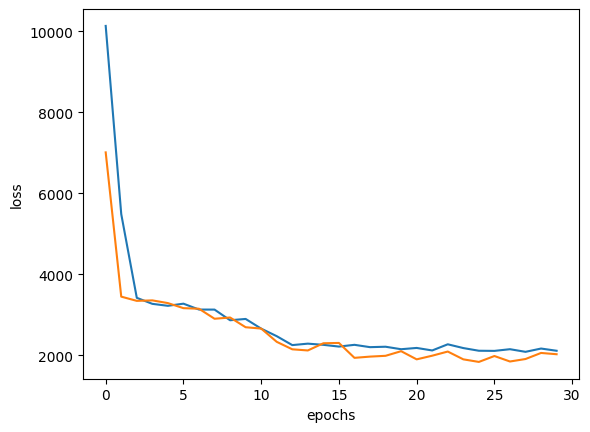

In [32]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32,  activation='relu'),
    tf.keras.layers.Dense(units=8,   activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model1.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['mae', 'mse']
)

history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data=[X_test, y_test],
    epochs=30
)

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')